In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

There are 3 categorical variables.

/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


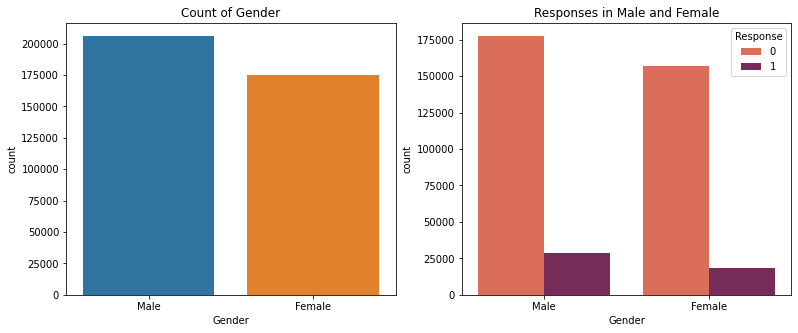

In [6]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Gender'])
plt.title("Count of Gender")
plt.subplot(1,2,2)
sns.countplot(train['Gender'], hue = train['Response'],palette="rocket_r")
plt.title("Responses in Male and Female")
plt.show()

The gender variable is equally distributed.

/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


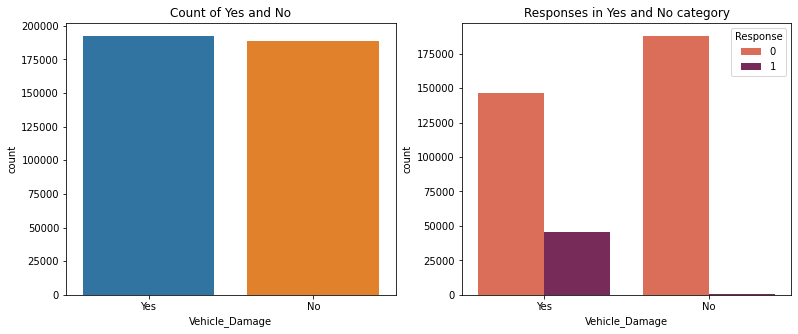

In [7]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Damage'])
plt.title("Count of Yes and No")
plt.subplot(1,2,2)
sns.countplot(train['Vehicle_Damage'], hue = train['Response'],palette="rocket_r")
plt.title("Responses in Yes and No category")
plt.show()

This shows that people with no vehicle damage mostly don't opt for vehicle insurance. This suggests this could be an important feature. Also the chart on the left shows that this variable is equally represented in the dataset.

In [8]:
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


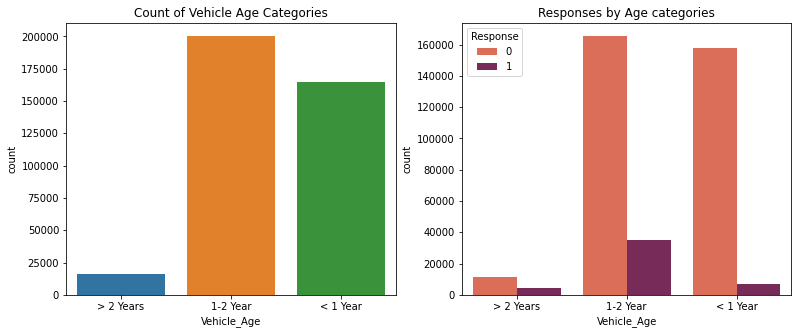

In [9]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Age'])
plt.title("Count of Vehicle Age Categories")
plt.subplot(1,2,2)
sns.countplot(train['Vehicle_Age'], hue = train['Response'],palette="rocket_r")
plt.title("Responses by Age categories")
plt.show()

Lets see if there is any missing value in the dataset

In [10]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

To check the quality of the dataset, lets see if any of the non-categorical columns have unreal values.

In [11]:
train.describe(percentiles=[0.25,0.5,0.75,0.99])

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
99%,377297.920000,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Driving License, Region_code, previously insured,policy sales channel are actually categorical variables

/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


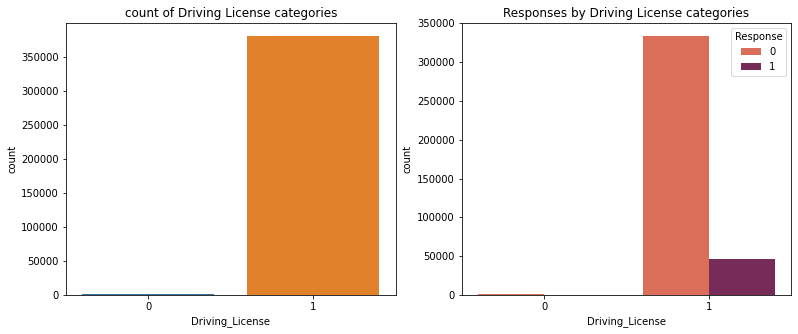

In [12]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Driving_License'])
plt.title("count of Driving License categories")
plt.subplot(1,2,2)
sns.countplot(train['Driving_License'], hue = train['Response'],palette="rocket_r")
plt.title("Responses by Driving License categories")
plt.show()

When plotting driving license by response, its clear that we don't have a lot of customers without a DL. This may or may not be a bad indicator

/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Region Representation in the data')

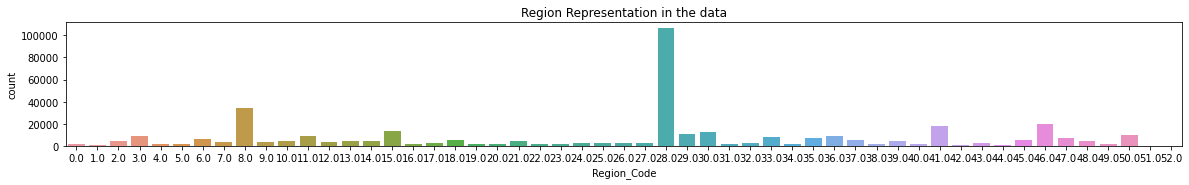

In [13]:
plt.figure(figsize = (20,5))
plt.subplot(2,1,1)
sns.countplot(train['Region_Code'])
plt.title("Region Representation in the data")


We can see here that some regions are more dominantly represented in the training data.

/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


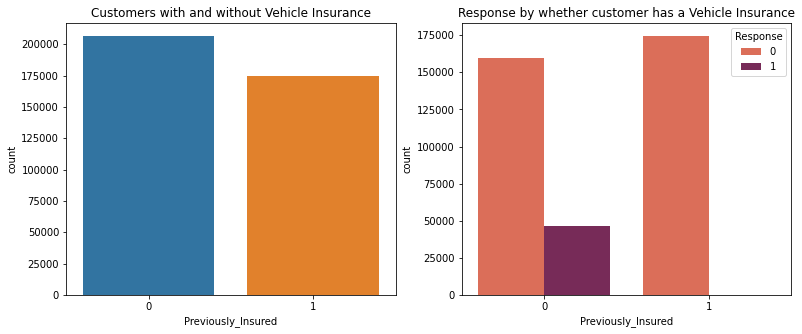

In [14]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Previously_Insured'])
plt.title("Customers with and without Vehicle Insurance")
plt.subplot(1,2,2)
sns.countplot(train['Previously_Insured'], hue = train['Response'],palette="rocket_r")
plt.title("Response by whether customer has a Vehicle Insurance")
plt.show()

As expected, customers who already have vehicle insurance are not willing to buy another. This could be an important variable.

Age: max of 85 and min of 20 make sense. However, we should check if the age of people is random or is there a dominant age group

/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


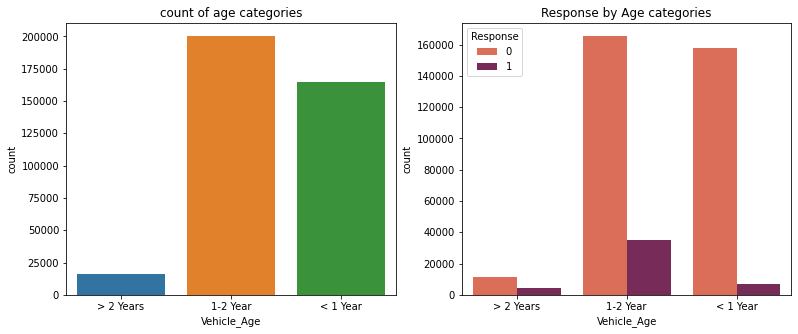

In [15]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Age'])
plt.title("count of age categories")
plt.subplot(1,2,2)
sns.countplot(train['Vehicle_Age'], hue = train['Response'],palette="rocket_r")
plt.title("Response by Age categories")
plt.show()

/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

Text(0.5, 1.0, 'Age distribution for customers who responded yes')

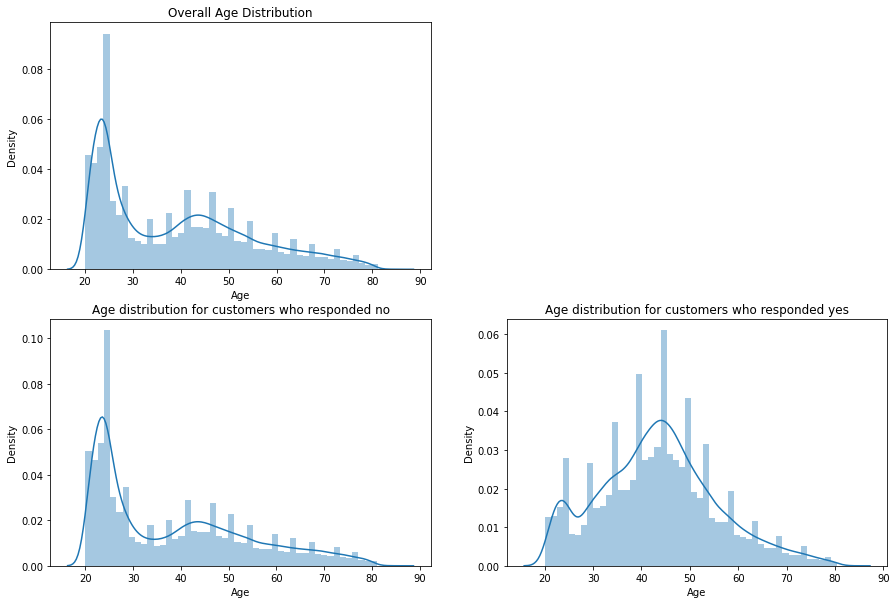

In [16]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.distplot(train['Age'])
plt.title("Overall Age Distribution")
plt.subplot(2,2,3)
sns.distplot(train[train['Response']==0]['Age'])
plt.title("Age distribution for customers who responded no")
plt.subplot(2,2,4)
sns.distplot(train[train['Response']==1]['Age'])
plt.title("Age distribution for customers who responded yes")

We see there are more people in the age group of 20-30 than 40-50 in the overall training data.

/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

Text(0.5, 1.0, 'Distribution for customers who responded yes')

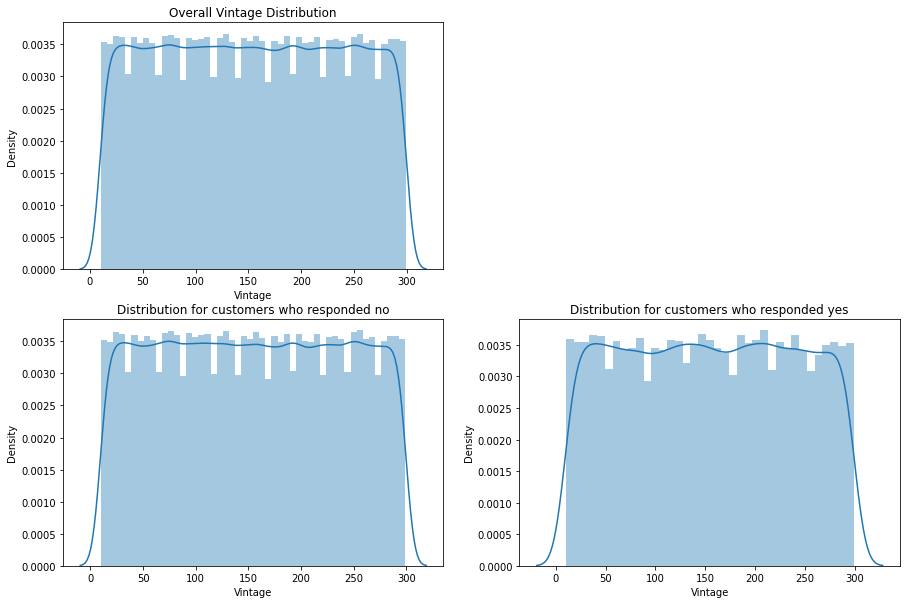

In [17]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.distplot(train['Vintage'])
plt.title("Overall Vintage Distribution")
plt.subplot(2,2,3)
sns.distplot(train[train['Response']==0]['Vintage'])
plt.title("Distribution for customers who responded no")
plt.subplot(2,2,4)
sns.distplot(train[train['Response']==1]['Vintage'])
plt.title("Distribution for customers who responded yes")

Here, we see that the distribution for the variable Vintage does not change overall and for different response variables.

/Users/adshah/Documents/Python/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

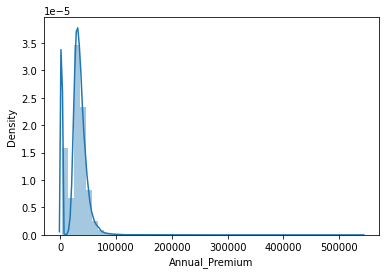

In [18]:
sns.distplot(train['Annual_Premium'])

The above graph and the describe suggests that there are outliers in this variable. To remove variables, we can use the 1.5iqr rule.

In [19]:
q3 =train['Annual_Premium'].quantile(0.75)
q1=train['Annual_Premium'].quantile(0.25)

In [20]:
iqr=q3-q1

upper_boundary=q3+(1.5*iqr)
lower_boundary=q1-(1.5*iqr)

In [21]:
train_new=train[train['Annual_Premium']>=lower_boundary]
train_new=train_new[train_new['Annual_Premium']<=upper_boundary]

In [22]:
y=train_new['Response']
X=train_new.loc[:, train_new.columns != 'Response']

In [23]:
from sklearn import preprocessing

cat_cols=['Gender','Vehicle_Damage','Vehicle_Age']
for col in cat_cols:
    le = preprocessing.LabelEncoder()
    X[col]=le.fit_transform(X[col])


<ipython-input-23-26cf3e593c7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=le.fit_transform(X[col])


In [24]:
X

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74


In [26]:
#Handling data imbalance using SMOTE:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)

In [27]:
y_sm.value_counts()

1    325634
0    325634
Name: Response, dtype: int64